### Figure 3B

In this figure we integrate epigenetic information from the H3K4me3 mark (methylation) and correlate it with the flux of the SAM cosubstrate.

In [2]:
import csv
import scipy 
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import linregress
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_h3k4me3=pd.read_csv("/epiflux/examples/data/epigenetics/dfi_T_15_me.csv")
df_h3k4me3_gene=df_h3k4me3.set_index('gene_id')

In [4]:
import csv
df_me=pd.read_csv("vectorME_15flux.csv",index_col=0)
df_me

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15
EX_Pme/vi,0.000084,0.000073,0.000097,0.00012,0.00015,0.000098,0.00012,0.000123,0.000124,0.000136,0.000102,0.000064,0.000058,0.000072,0.000066


To verify the correlation between the SAM flux vector and the H3K4me3 epigenetic mark the following was done:

In [5]:
# Create a list of vectors from the data in df_h3k9ac,
#where each vector corresponds to a gene_id and contains all the values associated with that gene_id in the df.
list_genes=[]
for k in range(df_h3k4me3.shape[0]):
    list_genes.append(df_h3k4me3["gene_id"][k])
    
dicc_genes={}
for index, row in df_h3k4me3.iterrows(): 
    if row["gene_id"] not in dicc_genes:
        dicc_genes[row["gene_id"]]=0
        
        
rows=df_h3k4me3.shape[0]
dicc_genes={}
for i in range(rows):
    row= (df_h3k4me3.iloc[i])
    new_list=[]
    for element in row:
        new_list.append(element)
    dicc_genes[new_list[0]]=new_list[1::]
        

list_vectors=[]
for i,k in dicc_genes.items():
    list_vectors.append(k)
#list_vectors   


In [16]:
#Calculate coef. correlation by vectors
def cal_coef_corr(a,b):
  """
  Calculates the given correlation coefficient
  two vectors a and b.

  This function receives "a" and "b" as lists
  """
  #Create arrays a and b from lists
  #This, in order to do operations between vectors
  array_a = np.array(a)
  array_b = np.array(b)

  #Calculate the averages of the vectors a and b
  mean_a = np.mean(a)
  mean_b = np.mean(b)

  #Calculate the distance of each data point from its mean
  distance_a = a-mean_a*np.array([1]*len(a))
  distance_b = b-mean_b*np.array([1]*len(b))

  # Calculate the dot product between these two distances
  # What has been the numerator of the equation of correlation coefficients
  numerator = np.dot(distance_a,distance_b)

   #Calculate the norm of â and b̂
   #Construction of the denominator
  norm_a = np.linalg.norm(distance_a)
  norm_b = np.linalg.norm(distance_b)

  denominator = norm_a*norm_b

  #Calculate the correlation coefficient
  coef_corr = numerator/denominator
  return coef_corr

#Add Vectors
list_corr=[]
for i in range(len(list_vectors)):
    list_corr.append(cal_coef_corr(list_vectors[i],np.array(df_me)[0]))

In [17]:
#Add correlation column to df
dfc=pd.DataFrame(list_corr,index =df_h3k4me3["gene_id"],columns = ['Coef_correlation']) #dfc contains the correlation coefficient of all genes
dfi_R=df_h3k4me3_gene
dfi_R['Coef_correlation']=dfc['Coef_correlation']
dfi_hc=df_h3k4me3_gene[dfi_R['Coef_correlation']>= .7]
dfi_hc #dfi_hc contains the coef. correlation greater than 0.7

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,Coef_correlation
gene_id,,,,,,,,,,,,,,,,
YAL055W,360.781987,378.665266,448.544266,442.167872,429.975090,457.654690,450.432261,497.181888,513.396569,512.351156,404.006636,358.859780,250.896321,304.244491,337.135419,0.831397
YAL051W,419.875589,428.635756,451.684599,466.664707,449.668605,442.704083,445.882441,424.142281,431.905050,451.800565,401.161519,413.579534,405.854483,398.720412,392.061976,0.708969
YAL040C,639.921499,697.365944,742.688814,847.590491,895.234395,882.085809,848.541583,797.028698,766.020278,850.502919,783.829777,670.635121,626.713598,594.077401,674.270838,0.854902
YAL025C,410.545020,453.065773,511.350931,591.598565,695.016987,652.843169,630.150184,609.944791,584.701648,557.065439,529.191791,408.489324,428.051910,424.341000,426.154322,0.873585
YAL019W,1553.539678,1710.101201,1968.988947,1938.924491,2172.851217,2392.097109,2284.010053,2227.067325,1972.094757,2201.246876,1903.383378,1748.487015,1834.387811,1425.145247,1484.911059,0.725469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPR144C,255.035543,267.619733,234.478216,296.411704,368.432854,369.612227,366.260576,371.605020,381.991495,340.946406,304.427536,291.414502,259.356370,269.016181,295.466996,0.715302
YPR159C-A,48.207938,61.075043,73.274442,143.306485,149.342493,122.927213,88.721506,106.355919,104.920331,106.196421,51.212109,99.259088,65.533973,51.241177,56.820576,0.705794
tG(GCC)P2,48.207938,61.075043,73.274442,143.306485,149.342493,122.927213,88.721506,106.355919,104.920331,106.196421,51.212109,99.259088,65.533973,51.241177,56.820576,0.705794


In [18]:
#Add column p-value to df
list_pvalue=[]

for i in range(len(list_vectors)):
    a=list_vectors[i]
    b=np.array(df_me)[0]
    t_statistic, p_value = ttest_ind(a, b)
    list_pvalue.append(p_value)

dfp=pd.DataFrame(list_pvalue,index =df_h3k4me3["gene_id"],columns = ['pvalue']) #dfp contains the pvalue of all genes

#Matrix containing the most significant correlation coefficient and pvalue
dfi_p=dfi_hc
dfi_p['pvalue']=dfp['pvalue']
dfi_pv=dfi_hc[dfi_p['pvalue']<= .0001]

#df ordered from highest correlation to lowest correlation
df_sorted = dfi_pv.sort_values('Coef_correlation', ascending=False)
df_sorted


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,Coef_correlation,pvalue
gene_id,,,,,,,,,,,,,,,,,
YOR281C,577.717708,558.559029,589.335873,620.994767,658.091645,622.111366,621.050542,622.758757,630.540627,644.630909,615.967864,537.017118,544.583874,522.019495,545.477532,0.949238,1.217739e-29
YEL053W-A,608.819603,638.511812,638.534427,672.438121,731.121765,641.214920,691.572765,727.833280,685.547403,748.032688,655.799505,579.011348,558.485374,566.855525,604.192127,0.940953,7.705298e-27
YNL114C,321.127070,322.032044,371.606101,390.724518,420.128332,357.983977,420.858426,420.298091,373.842343,393.113069,371.287789,282.506636,261.472986,288.231623,312.513169,0.930001,3.854810e-21
YOR283W,540.395433,547.454475,574.680985,618.545084,654.809392,573.937188,609.675990,620.195964,588.776224,608.300555,604.587396,489.932679,534.049843,517.215634,539.795474,0.925945,1.228868e-28
YKR082W,709.900764,724.016872,794.504312,799.821663,928.877484,808.163364,814.417927,898.259030,812.877901,837.461253,809.435831,699.903827,679.945795,749.402220,676.164857,0.922666,2.790287e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YHR064C,775.214744,849.498324,994.438862,974.974033,989.599157,960.991790,905.414344,891.852047,877.052472,999.550528,847.844913,745.715714,837.943181,706.167476,871.248836,0.701166,2.398438e-25
YLR018C,732.449638,801.748745,837.422200,859.838909,970.726205,869.626970,821.242658,876.475288,778.244005,885.901726,805.168155,805.525677,810.290092,661.331446,732.985434,0.701143,5.533360e-27
YPL252C,1161.655795,1319.220927,1356.100575,1433.064848,1501.630562,1619.649084,1556.038721,1646.594656,1473.977848,1631.139772,1381.304380,1338.725138,1395.392255,1056.849284,1094.743102,0.700834,1.770557e-22


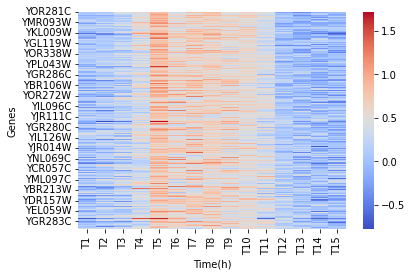

In [19]:
#heatmap of genes highly correlated with SAM vector
dfi_pv_norm_hc=df_sorted.apply(lambda x: (x-x.mean())/x.std(), axis = 1) #normalization
ax=sns.heatmap(dfi_pv_norm_hc.iloc[:,0:15], cmap=sns.color_palette("coolwarm", as_cmap=True)
)

ax.set(xlabel="Time(h)", ylabel="Genes")
plt.savefig("Fig3C.pdf")

In [20]:
#To know the names of the genes with the highest correlation and the lowest pvalue
#and submit them to gene ongology using the DAVID tool:
for index,valor in df_sorted["pvalue"].items():
    print(index) 


YOR281C
YEL053W-A
YNL114C
YOR283W
YKR082W
YOR282W
YEL026W
YKR081C
YBL072C
YNL113W
YCL059C
YDR060W
YLR293C
YKR044W
YEL054C
YHR039C-A
YKL056C
YNL247W
YHL007C
YCL058W-A
tF(GAA)M
YDR109C
YER110C
YDR526C
YPR010C
YJR055W
YML080W
YMR093W
YGR239C
YML019W
YAL025C
YLR007W
YDR527W
YKR043C
YLL008W
YHL006W-A
YHR072W
YNL163C
YDL153C
YML099C
YML125C
YDL063C
YDR110W
YOL097C
YPL044C
YOL093W
YKL216W
YLR065C
YKL144C
YLL010C
YOR294W
YHR040W
YER127W
YIL053W
YKL009W
YML130C
YBR105C
YDL150W
YBR114W
YJL148W
YMR049C
YBR191W-A
YNL248C
YBR191W
YAL040C
YIL079C
YLR432W
YJL069C
YER126C
YHR066W
YCL018W
YLR409C
YGL120C
YGR210C
YKR059W
YOR133W
YKL023C-A
YIL103W
YLR449W
YLR017W
YML006C
YGL119W
YJL138C
YCL037C
YLR009W
YJL123C
YDL062W
YER002W
YNL112W
YBR034C
YKR056W
YMR269W
YHR019C
YLR029C
YOL077C
YGL123C-A
YDL229W
YER036C
YDL055C
YMR141W-A
YOR310C
YGR081C
YOR293C-A
YLR016C
YMR120C
YPL211W
YGR245C
YLR015W
YOR338W
YNR013C
YDR385W
YMR290C
YHR065C
YKL098W
YDL131W
YJR016C
YKL166C
YER010C
YDR091C
YAL055W
YIL018W
YHR179W
YBR08